# Introduction

It was interesting for me to try the MLR on cost/price prediction. For this purpose, a number of different datasets from kaggle were tried. However, most of them ended up unsuitable for this work. Reasons were - strong collinearity of the predictor variables, not enough/ too much predictors, or unreal to model to with LR. 

__About the dataset:__
Finally, the dataset of cost of the cars were chosen. It was taken from kaggle - https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv and further some data preparation steps were done. For convinience and interpretability of results purposes only Hyundai cars were considered and random 200 samples among them were taken. 

Initially dataset had 13 column, including response varible - selling price. Right from the beginning full name of the car was replaced by car series inly (Elantra, Creta , etc). Also # of seats variable was removed, since almost all cars had 5 seats. 

So, finally, I had 10 predictor variables (5 categorical and 5 numerical) and 200 samples.

The research question in this work is: 

__What is the best linear regression equation that would predict price of the car given its characteristics?__

__Content of the project:__
1. Fitting and analysing the full model;
2. Model selection - predictors selection, checking for outliers and collinearity
3. Model diagnostics - checking for assumptions, and remedial measures

# Analysis

In [ ]:
install.packages('car')
install.packages('olsrr')
install.packages('dplyr')
install.packages('MASS')
install.packages("lmtest")
install.packages('lawstat')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data = read.csv('cars1.csv')
head(data)

,full_name,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Hyundai Verna 1.6 SX,Verna,2012,395000,120000,Diesel,Individual,Manual,First Owner,22.32,1582,126.32,5
2,Hyundai Elantra SX AT,Elantra,2013,690000,68000,Petrol,Dealer,Automatic,First Owner,14.50,1797,147.50,5
3,Hyundai Grand i10 CRDi Asta,Grand,2014,380000,50000,Diesel,Individual,Manual,Second Owner,24.00,1120,70.00,5
4,Hyundai Verna 1.4 CRDi,Verna,2016,710000,40000,Diesel,Individual,Manual,First Owner,24.80,1396,88.70,5
5,Hyundai Aent CRDi,Aent,2005,200000,200000,Diesel,Individual,Manual,Second Owner,13.10,1493,82.00,5
6,Hyundai Elantra S,Elantra,2016,805000,49900,Petrol,Dealer,Manual,First Owner,16.30,1797,147.50,5


In [ ]:
data$full_name <- NULL
data$seats <- NULL
data <- na.omit(data)

In [ ]:
head(data)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Verna,2012,395000,120000,Diesel,Individual,Manual,First Owner,22.32,1582,126.32
2,Elantra,2013,690000,68000,Petrol,Dealer,Automatic,First Owner,14.50,1797,147.50
3,Grand,2014,380000,50000,Diesel,Individual,Manual,Second Owner,24.00,1120,70.00
4,Verna,2016,710000,40000,Diesel,Individual,Manual,First Owner,24.80,1396,88.70
5,Aent,2005,200000,200000,Diesel,Individual,Manual,Second Owner,13.10,1493,82.00
6,Elantra,2016,805000,49900,Petrol,Dealer,Manual,First Owner,16.30,1797,147.50


## Preliminary model fitting

We start with the full model for each ith observation:

$Y = \beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_4+...+\beta_{10}x_{10}$

In [ ]:
model = lm(selling_price~., data=data)

In [ ]:
summary(model)


Call:
lm(formula = selling_price ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-189361  -51688   -3921   50351  306473 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -9.606e+07  7.043e+06 -13.638  < 2e-16 ***
nameCreta                    3.827e+05  8.311e+04   4.605 8.11e-06 ***
nameElantra                  1.194e+05  9.310e+04   1.283 0.201336    
nameElite                   -1.096e+05  8.426e+04  -1.301 0.195093    
nameEON                     -2.817e+05  1.069e+05  -2.635 0.009203 ** 
nameGetz                     6.485e+03  1.212e+05   0.054 0.957382    
nameGrand                   -2.334e+05  8.290e+04  -2.816 0.005446 ** 
namei10                     -2.400e+05  8.065e+04  -2.976 0.003355 ** 
namei20                     -1.113e+05  7.412e+04  -1.502 0.134925    
nameSanta                    4.177e+05  1.381e+05   3.025 0.002873 ** 
nameSantro                  -2.674e+05  8.445e+04  -3.166 

## Model Selection

### Predictors selection

Loading required package: carData



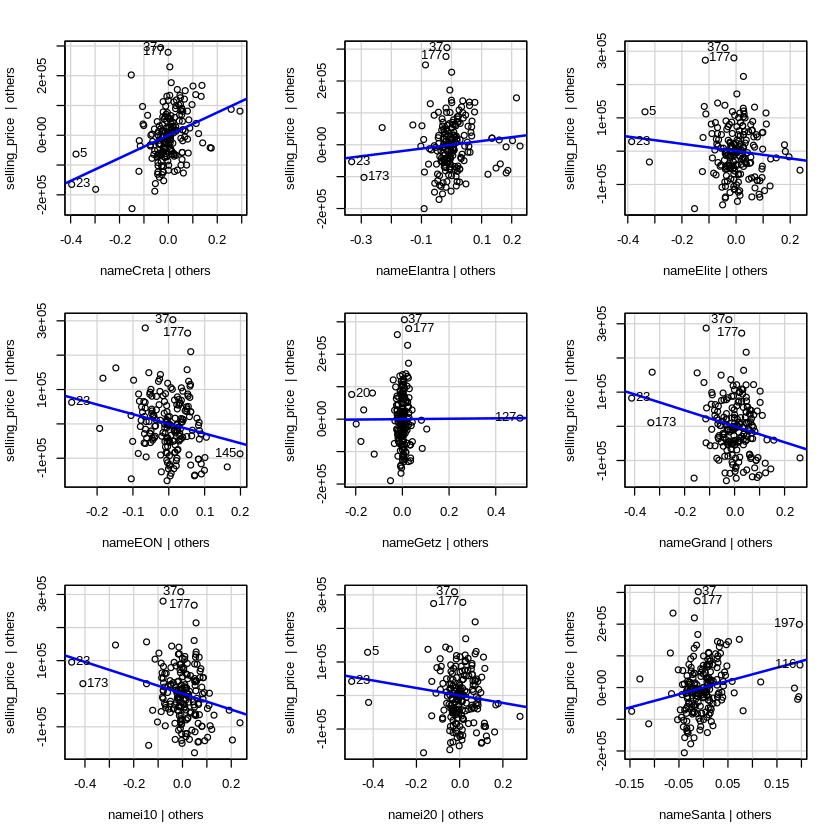

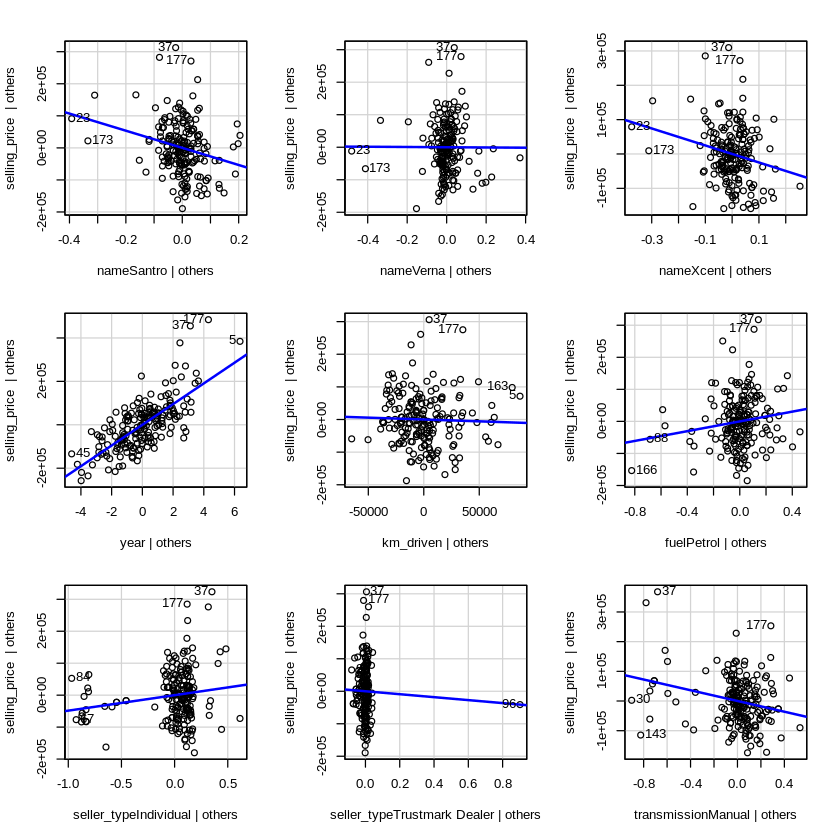

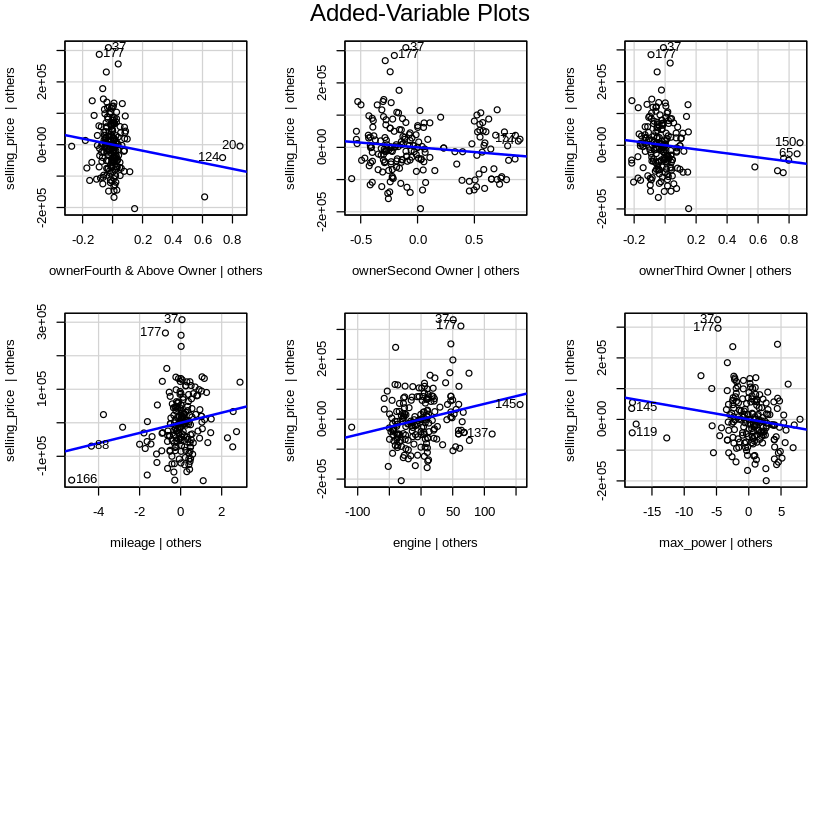

In [ ]:
library(car)
avPlots(model)

In [ ]:
library(olsrr)
ols_step_backward_p(model)


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers






                              Elimination Summary                               
-------------------------------------------------------------------------------
        Variable                   Adj.                                            
Step     Removed     R-Square    R-Square     C(p)         AIC          RMSE       
-------------------------------------------------------------------------------
   1    km_driven      0.9121      0.9001    -4.8093    4957.0174    85813.9969    
-------------------------------------------------------------------------------

Both from added variables plots and automatics selection procedures we can see that km_driven is not significant for our model prediction. Let's remove it.

(Forward and Both automatic method was also tried. Backward elimination revealed subjectively best results)

Also, from AVPs there is no obvious nonlinear patterns. So, no need for higher order and interaction terms.

In [ ]:
model1 = update(model, .~.-km_driven)
summary(model1)


Call:
lm(formula = selling_price ~ name + year + fuel + seller_type + 
    transmission + owner + mileage + engine + max_power, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-187586  -52290   -3597   51097  305924 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -9.730e+07  6.426e+06 -15.143  < 2e-16 ***
nameCreta                    3.835e+05  8.290e+04   4.626  7.4e-06 ***
nameElantra                  1.177e+05  9.280e+04   1.269 0.206241    
nameElite                   -1.084e+05  8.401e+04  -1.290 0.198892    
nameEON                     -2.789e+05  1.065e+05  -2.620 0.009603 ** 
nameGetz                     7.717e+03  1.208e+05   0.064 0.949160    
nameGrand                   -2.323e+05  8.266e+04  -2.810 0.005532 ** 
namei10                     -2.390e+05  8.043e+04  -2.972 0.003395 ** 
namei20                     -1.111e+05  7.394e+04  -1.503 0.134719    
nameSanta                    4.206e+05 

As we can observe even if very slight there is some improvement in $R^2_a$ score.
Model function is :
$Y = \beta_0+\beta_1x_1+\beta_2x_2+\beta_4x_4+...+\beta_{10}x_{10}$

(term $\beta_3x_3$ - km_driven is removed)

### Collinearity

In [ ]:
library(car)
vif(model1)

,GVIF,Df,GVIF^(1/(2*Df))
name,534.143579,12,1.299129
year,2.987406,1,1.728411
fuel,8.808740,1,2.967952
seller_type,1.310684,2,1.069977
transmission,1.417366,1,1.190532
owner,2.317977,3,1.150407
mileage,8.140112,1,2.853088
engine,45.996355,1,6.782061
max_power,41.082901,1,6.409594


VIF coefficients show that there are some predictors involved in collinearity with others. However, removing them resulted in worse $R^2_a$. Also, name of the car and other characteristics seem to be intuitively significant. They also have low p-values in summary(model) table. 
Therefore, name, engine and max_power variables were leaved in the model.

### Outliers

Also, from added variable plots shown above it seems like there are some _outliers_ influencing the regression fit line. Let's check them

In [ ]:
outlierTest(model1)

   rstudent unadjusted p-value Bonferroni p
37  4.03238         8.3613e-05      0.01597

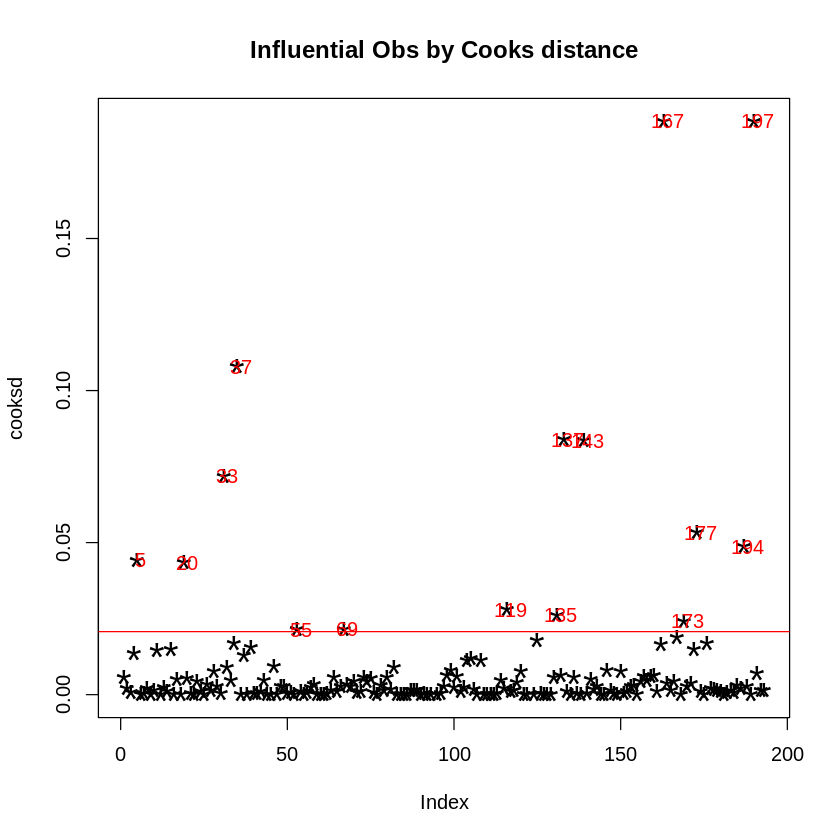

In [ ]:
cooksd <- cooks.distance(model1)

# Plot the Cook's Distance using the traditional 4/n criterion
sample_size <- nrow(data)
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cooks distance")  # plot cook's distance
abline(h = 4/sample_size, col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4/sample_size, names(cooksd),""), col="red")  # add labels

Indeed, according to studentized deleted residuals and cooks's distance, there are some sample points outliying from general pattern. Let's eliminate them.

In [ ]:
influential = c(5,20,33,37,55,69,119,135,137,143,167,173,177,194,197)
data_screen = data[-influential, ]

In [ ]:
model2 = lm(selling_price ~ .-km_driven, data = data_screen)

In [ ]:
summary(model2)


Call:
lm(formula = selling_price ~ . - km_driven, data = data_screen)

Residuals:
    Min      1Q  Median      3Q     Max 
-197570  -49936   -4453   40798  340676 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -9.116e+07  6.745e+06 -13.516  < 2e-16 ***
nameCreta                    4.135e+05  8.912e+04   4.640 7.32e-06 ***
nameElantra                  1.437e+05  9.334e+04   1.540 0.125697    
nameElite                   -7.074e+04  8.917e+04  -0.793 0.428760    
nameEON                     -3.122e+05  1.088e+05  -2.870 0.004679 ** 
nameGetz                     5.396e+02  1.193e+05   0.005 0.996396    
nameGrand                   -2.242e+05  8.680e+04  -2.582 0.010730 *  
namei10                     -2.378e+05  8.265e+04  -2.878 0.004567 ** 
namei20                     -9.301e+04  7.933e+04  -1.172 0.242818    
nameSanta                    4.712e+05  1.390e+05   3.390 0.000887 ***
nameSantro                  -2.622e+05 

Again, we see a slight improvement of the $R^2_a$ score.


## Model diagnostics

### Linearity

__e VS Y_fitted__

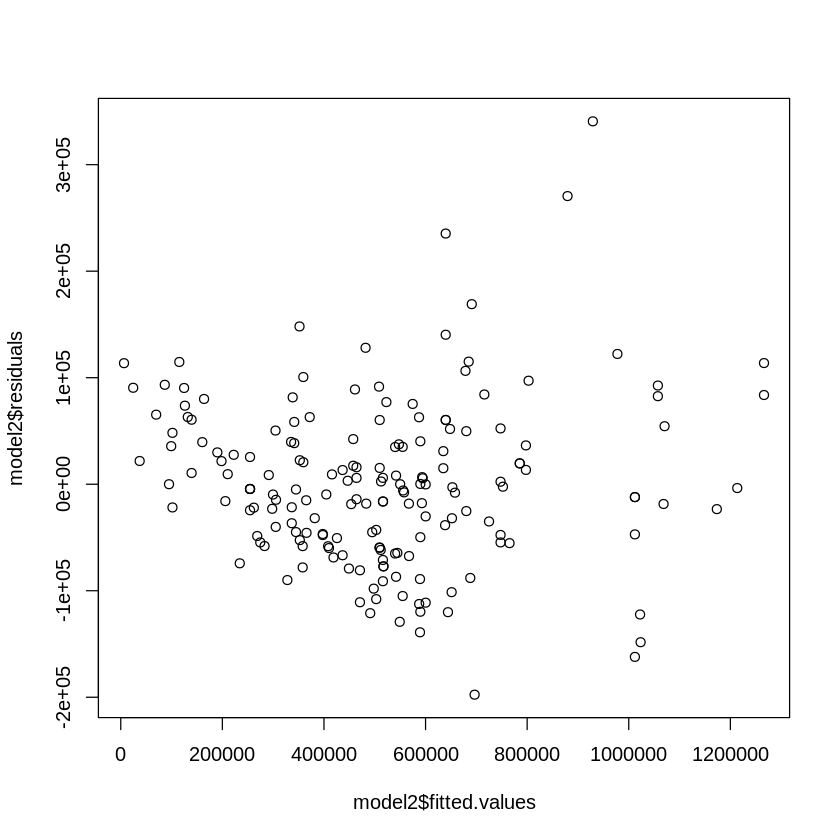

In [ ]:
plot(model2$residuals~model2$fitted.values)

No nonlinear pattern, despite nonhomogenuity (discussed later).


__e vs Numerical Predictors__

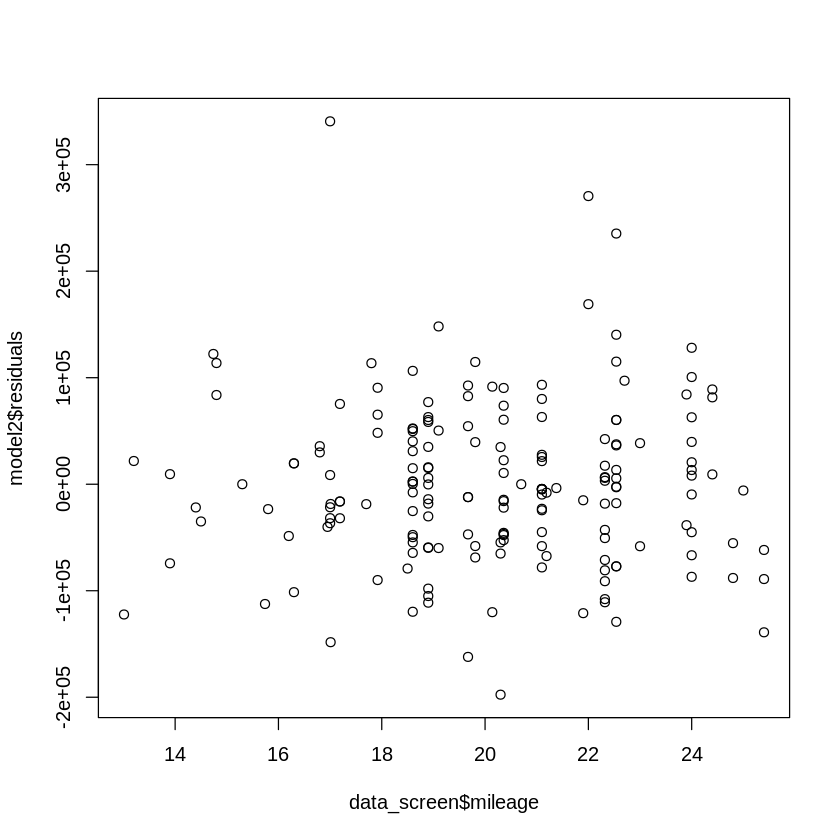

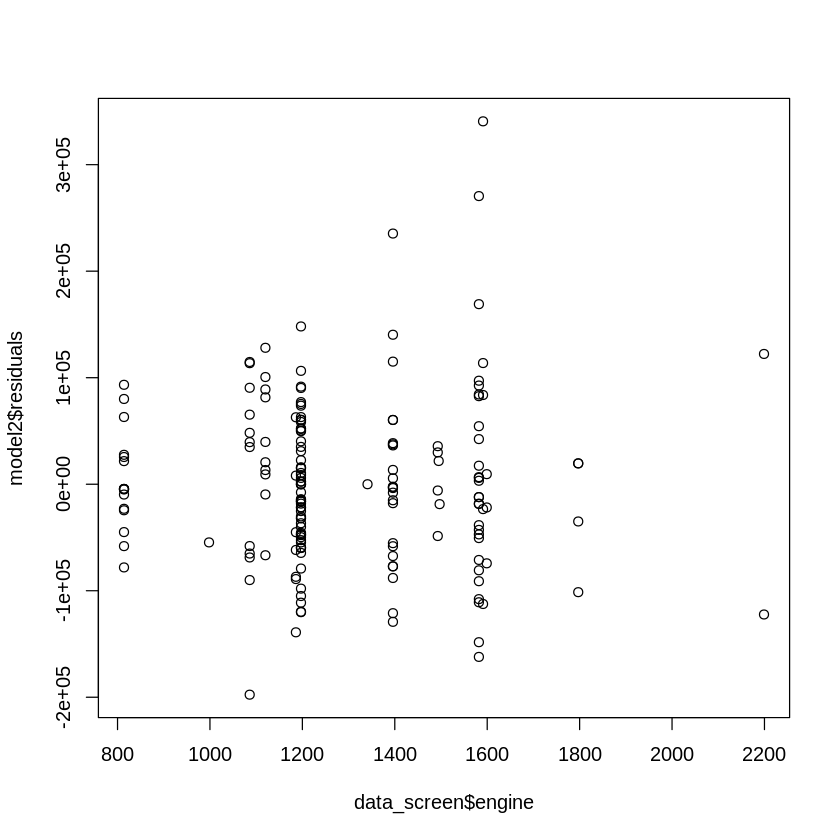

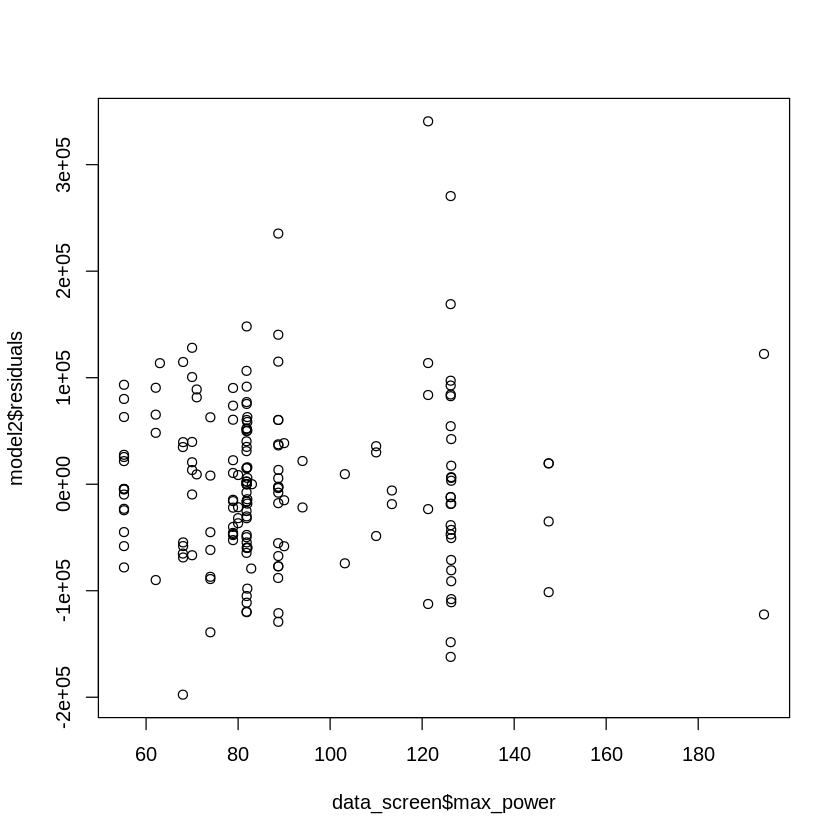

In [ ]:
plot(model2$residuals~data_screen$mileage)
plot(model2$residuals~data_screen$engine)
plot(model2$residuals~data_screen$max_power)

Plots of residuals against predictors does seem okay (No evident nonlinear patterns)

### Constant Variance

As we saw in the plot of residuals against fitted values there is some evident "megaphone shape".

In [ ]:
library(lmtest)
bptest(model2)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  model2
BP = 57.655, df = 23, p-value = 8.278e-05


BP test also supports that we have nonhomogenious variance.

#### Remedy 1 - transformation $Y' = \sqrt{Y}$

In [ ]:
model3 = update(model2, I(selling_price^(1/2))~.)
summary(model3)


Call:
lm(formula = I(selling_price^(1/2)) ~ name + year + fuel + seller_type + 
    transmission + owner + mileage + engine + max_power, data = data_screen)

Residuals:
   Min     1Q Median     3Q    Max 
-99.56 -29.76   0.00  25.45 153.74 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -6.542e+04  3.825e+03 -17.104  < 2e-16 ***
nameCreta                    2.897e+02  5.054e+01   5.732 4.97e-08 ***
nameElantra                  1.544e+02  5.293e+01   2.917  0.00405 ** 
nameElite                    2.427e+01  5.057e+01   0.480  0.63191    
nameEON                     -1.669e+02  6.169e+01  -2.706  0.00756 ** 
nameGetz                     2.663e+01  6.764e+01   0.394  0.69439    
nameGrand                   -6.828e+01  4.923e+01  -1.387  0.16739    
namei10                     -9.955e+01  4.687e+01  -2.124  0.03525 *  
namei20                      2.392e+01  4.499e+01   0.532  0.59572    
nameSanta                    3.40

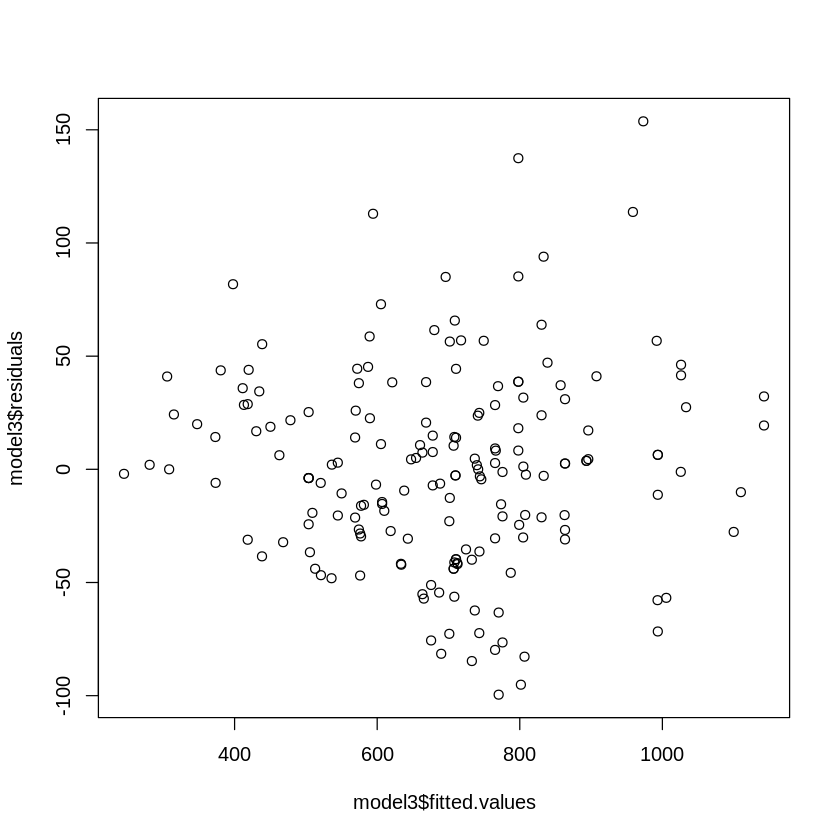

In [ ]:
plot(model3$residuals~model3$fitted.values)

#### Remedy 2 - Weighted Least Squares

In [ ]:
abs.re = abs(model2$residuals)
model.re = lm(abs.re ~ model2$fitted.values, data = data_screen)

In [ ]:
omega <- 1/(model.re$fitted.values)^2
wls <- lm(selling_price ~ .-km_driven, data = data_screen, weights=omega)

In [ ]:
summary(wls)


Call:
lm(formula = selling_price ~ . - km_driven, data = data_screen, 
    weights = omega)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2.6907 -0.8793 -0.1249  0.6675  5.5113 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -7.915e+07  5.818e+06 -13.605  < 2e-16 ***
nameCreta                    4.685e+05  7.293e+04   6.424 1.53e-09 ***
nameElantra                  1.872e+05  7.872e+04   2.378 0.018638 *  
nameElite                   -6.944e+03  7.167e+04  -0.097 0.922948    
nameEON                     -3.060e+05  9.020e+04  -3.393 0.000877 ***
nameGetz                    -1.702e+02  8.108e+04  -0.002 0.998328    
nameGrand                   -1.835e+05  6.700e+04  -2.739 0.006887 ** 
namei10                     -2.207e+05  6.309e+04  -3.499 0.000609 ***
namei20                     -5.866e+04  5.856e+04  -1.002 0.318013    
nameSanta                    5.541e+05  1.375e+05   4.029 8.72e-05 ***
nameSant

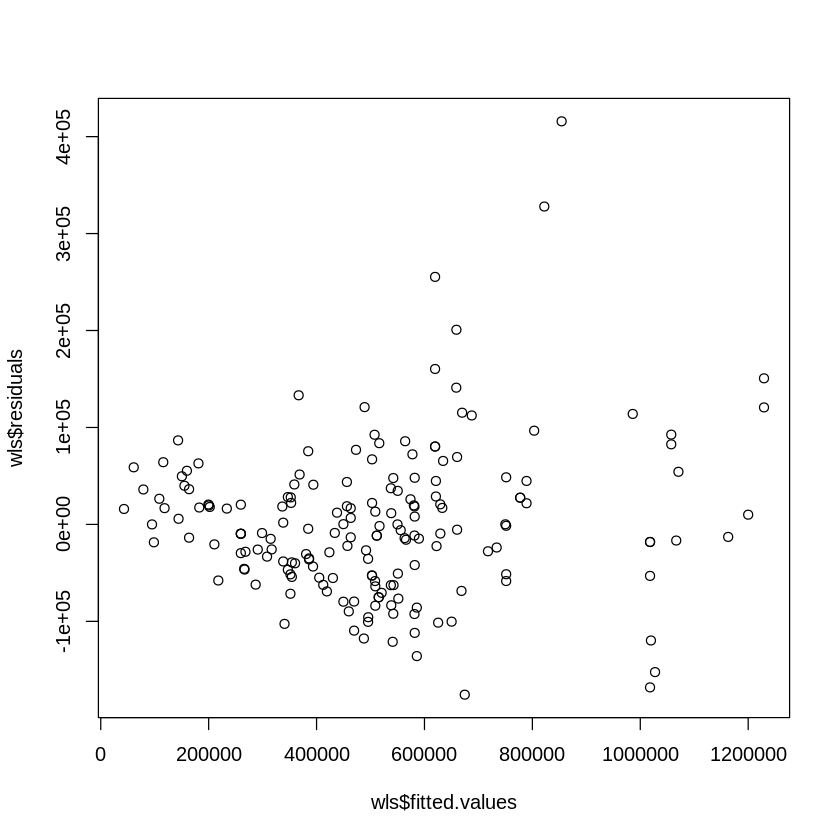

In [ ]:
plot(wls$residuals~wls$fitted.values)

It seem like, here, simpler remedy of transformation performs better that WLS.
Updated model function:
$Y = (\beta_0+\beta_1x_1+\beta_2x_2+\beta_4x_4+...+\beta_{10}x_{10})^2$

### Normality of errors

Since dataset is relatively large >50, QQ plot is prefered to Shapiro-Wilk test (too sensitive to fluctuations). 

In [ ]:
re3=model3$residuals

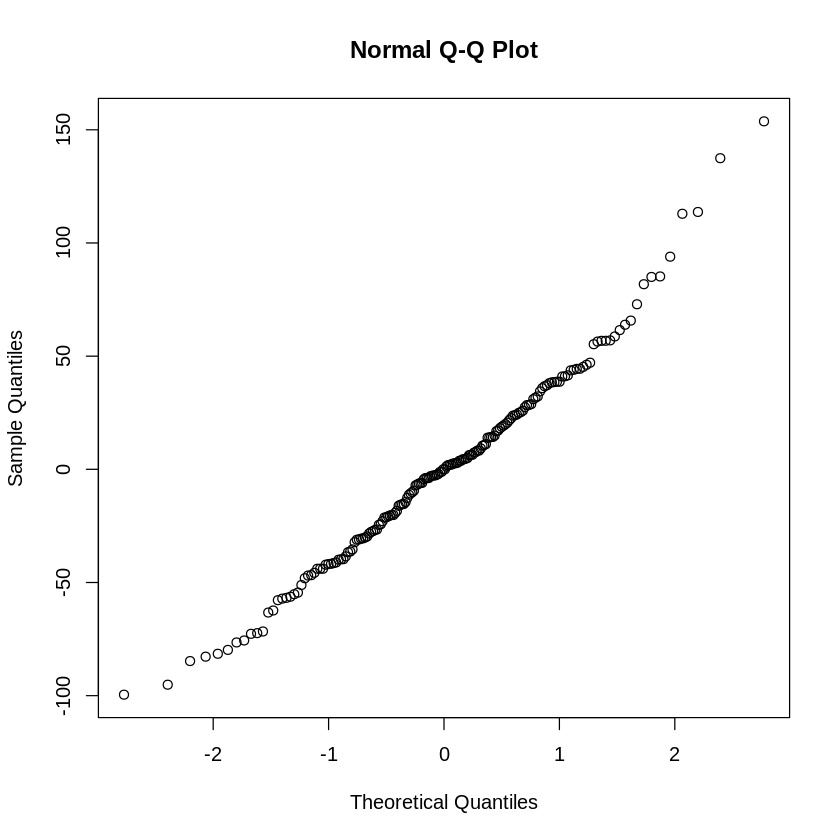

In [ ]:
qqnorm(re3)


QQ plot of residuals does not reveal any significant inconsistency.

### Independence

In [ ]:
library(lawstat)
runs.test(re3)


Attaching package: ‘lawstat’


The following object is masked from ‘package:car’:

    levene.test





	Runs Test - Two sided

data:  re3
Standardized Runs Statistic = -1.1959, p-value = 0.2317


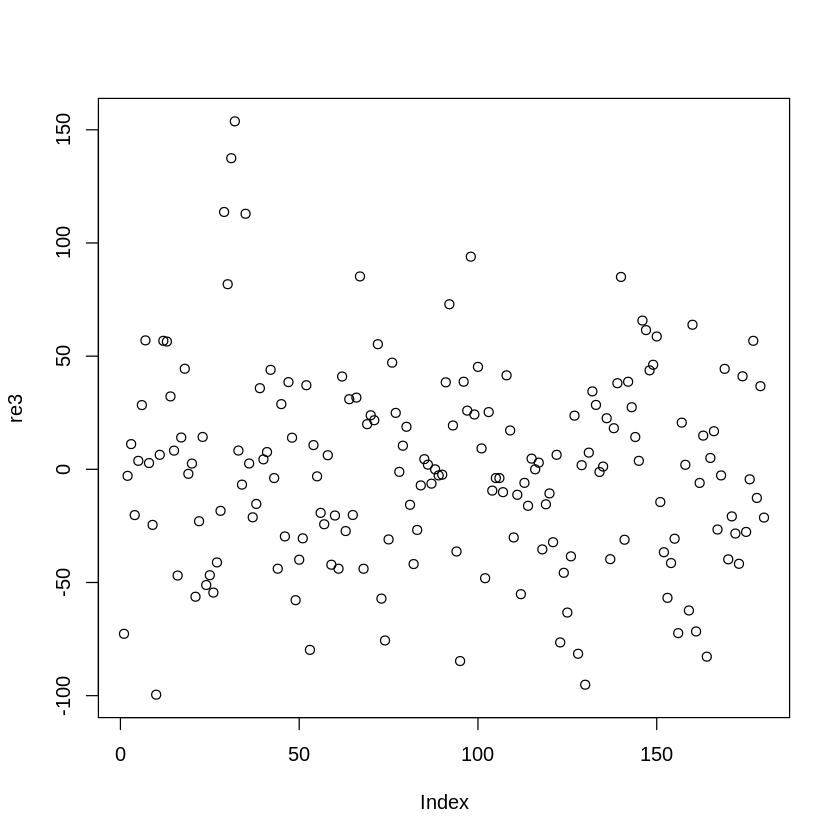

In [ ]:
plot(re3)

Indepence assumption is hold here.

# Conclusion

In [ ]:
model3$coefficients

(Intercept)                   nameCreta 
              -6.542248e+04                2.897222e+02 
                nameElantra                   nameElite 
               1.544282e+02                2.427108e+01 
                    nameEON                    nameGetz 
              -1.669385e+02                2.662600e+01 
                  nameGrand                     namei10 
              -6.828295e+01               -9.955346e+01 
                    namei20                   nameSanta 
               2.391840e+01                3.403106e+02 
                 nameSantro                   nameVerna 
              -1.223615e+02                5.202307e+01 
                  nameXcent                        year 
              -9.016498e+01                3.258940e+01 
                 fuelPetrol       seller_typeIndividual 
               5.917940e+01                2.422733e+01 
seller_typeTrustmark Dealer          transmissionManual 
              -3.920130e+01               -6.712045e+01 
  ownerFourth & Above Owner           ownerSecond Owner 
              -6.980073e+01               -2.554945e+01 
           ownerThird Owner                     mileage 
              -4.104854e+01                1.626442e+01 
                     engine                   max_power 
               1.580643e-01               -5.418966e-01

After the analysis of the model, proper model predictors selection, diagnostics and, consequently, remedial procedures, the final equation of the regression fit model is:

$Y = (\beta_0+\beta_1x_1+\beta_2x_2+\beta_4x_4+...+\beta_{10}x_{10})^2$

where $\beta_i$ is taken from the cell with coefficients above. 

There is no significant differences from initial full model, except that $x_3$ (km_driven) were removed and square root transformation was applied for responce variable.

Due to this changes $R_a^2$ was improved from 0.8997 to 0.9362 in our final suggested model.

In [ ]:
library(olsrr)
ols_mallows_cp(model3, model)


[1] -160

In [ ]:
c(AIC(model), AIC(model3))

[1] 4958.798 1916.466

In [ ]:
c(BIC(model), BIC(model3))

[1] 5043.628 1996.289

From all known to us criteria we can conclude that our model outperforms the full model used initially. It was also tested on the assumption of Linear Regression.

__Discussion:__ In this project selling price of the cars were tried to be predicted from other characteristics of the car. It is worth to note that the initial full model was quite succesfull too with $R^2_a~.9$. However, our refined model even if slightly, but outperforms it. 

Therefore, it can be concluded that methodology to deal with predictors is helpful and can be used to build a better models. There also were some difficulties during the project. First was with selection of datasets, I had to try 6 other datasets before this one - Linear Regression could be used to solve all problems. Second, different model selection method showed different results, so sometim es it was difficult to choose which one rely to. Also, categorical predictors were harder to interpret in the plots

__Recommendation and commentary:__The dataset was adjusted so that it is interpretable and easier to use. The original dataset would require addition work. Also, collinear predictors were remained unchanged here, in future works Ridge regression can be tried to resolve the issue.

__PS__ Overall, thank you very much for the course. Did not think that there can be so much behind the Linear Regression
